<a href="https://colab.research.google.com/github/erick-huang15/Python_Exercises/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, random_state=42)

In [4]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(StandardScaler(), knn)

In [5]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [6]:
print('train accuracy:', knn_pipe.score(X_train, y_train))
print('\n')
print('test accuracy:', knn_pipe.score(X_test, y_test))

train accuracy: 0.9625904761904762


test accuracy: 0.9442285714285714


Text(0, 0.5, 'Score')

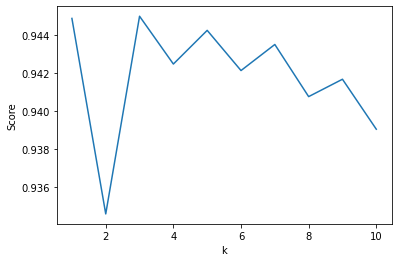

In [7]:
k_list = []

for k in range(1,11):
  knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
  knn_pipe.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

plt.plot(range(1,11), k_list)
plt.xlabel('k')
plt.ylabel('Score')

In [8]:
knn_best = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn_best.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [9]:
print('new train accuracy:', knn_best.score(X_train, y_train))
print('\n')
print('new test accuracy:', knn_best.score(X_test, y_test))

new train accuracy: 0.9714095238095238


new test accuracy: 0.9449714285714286


### PCA 


In [10]:
#using PCA to lower the dimensions in this dataset while retaining 95% of the variance
pca = PCA(n_components=.95)
transformer = make_pipeline(StandardScaler(), pca)

In [11]:
knn_pca = make_pipeline(transformer, knn)

In [12]:
knn_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [13]:
print('PCA train accuracy:', knn_pca.score(X_train, y_train))
print('\n')
print('PCA test accuracy:', knn_pca.score(X_test, y_test))

PCA train accuracy: 0.9650285714285715


PCA test accuracy: 0.9477714285714286


Text(0, 0.5, 'Score')

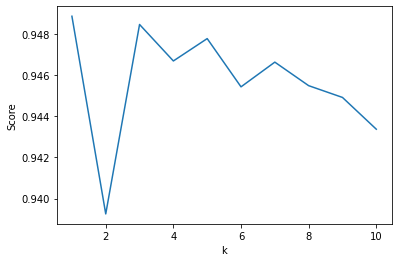

In [19]:
k_pca_list = []

for k in range(1,11):
  knn_pca = make_pipeline(transformer, KNeighborsClassifier(n_neighbors=k))
  knn_pca.fit(X_train, y_train)
  score = accuracy_score(y_test, knn_pca.predict(X_test))
  k_pca_list.append(score)

plt.plot(range(1,11), k_pca_list)
plt.xlabel('k')
plt.ylabel('Score')

In [23]:
knn_pca_best = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn_pca_best.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

In [24]:
print('PCA best train accuracy:', knn_pca_best.score(X_train, y_train))
print('\n')
print('PCA best test accuracy:', knn_pca_best.score(X_test, y_test))

PCA best train accuracy: 0.9714095238095238


PCA best test accuracy: 0.9449714285714286


In [27]:
%%time
preds_pca = knn_pca_best.predict(X_test)

CPU times: user 1min 37s, sys: 3.34 s, total: 1min 40s
Wall time: 57.3 s


In [28]:
%%time
preds_no_pca = knn_best.predict(X_test)

CPU times: user 1min 37s, sys: 1.38 s, total: 1min 38s
Wall time: 55.9 s


Score from Tests
- PCA Improved Training Accuracy: 0.9714
- PCA Improved Test Accuracy: 0.9449
- PCA Test Accuracy: 0.9650
- PCA Training Accuracy: 0.9477
- KNN Improved Training Accuracy: 0.9714
- KNN Improved Test Accuracy:0.9449
- KNN Training Accuracy: 0.9449
- KNN Test Accuracy:0.9442



5. Answer the Following Questions in Text:
a. which model performed the best on the test set? Both model performed the same after tuning but before tuning the PCA performed better
b. which model was the fastest at making prediction? Based on the wall time, the PCA performend faster